# Gabor Activation

In [1]:
import itertools, cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image, math

---

### FILTERS

In [2]:
def gabor_filter(sigma_x, sigma_y, deg, samples=20, k=2, min=-5, max=5):
    gradient = np.linspace(min, max, samples)
    X, Y = np.meshgrid(gradient, gradient)

    rad = np.deg2rad(deg)
    X = X * np.cos(rad) - Y * np.sin(rad)
    Y = X * np.sin(rad) + Y * np.cos(rad)

    C = 1 / (2 * math.pi * sigma_x * sigma_y)
    z = C * np.exp(-(X**2) / (2 * sigma_x**2) - (Y**2) / (2 * sigma_y**2))
    gabor = np.cos(X * k) * z
    return gabor

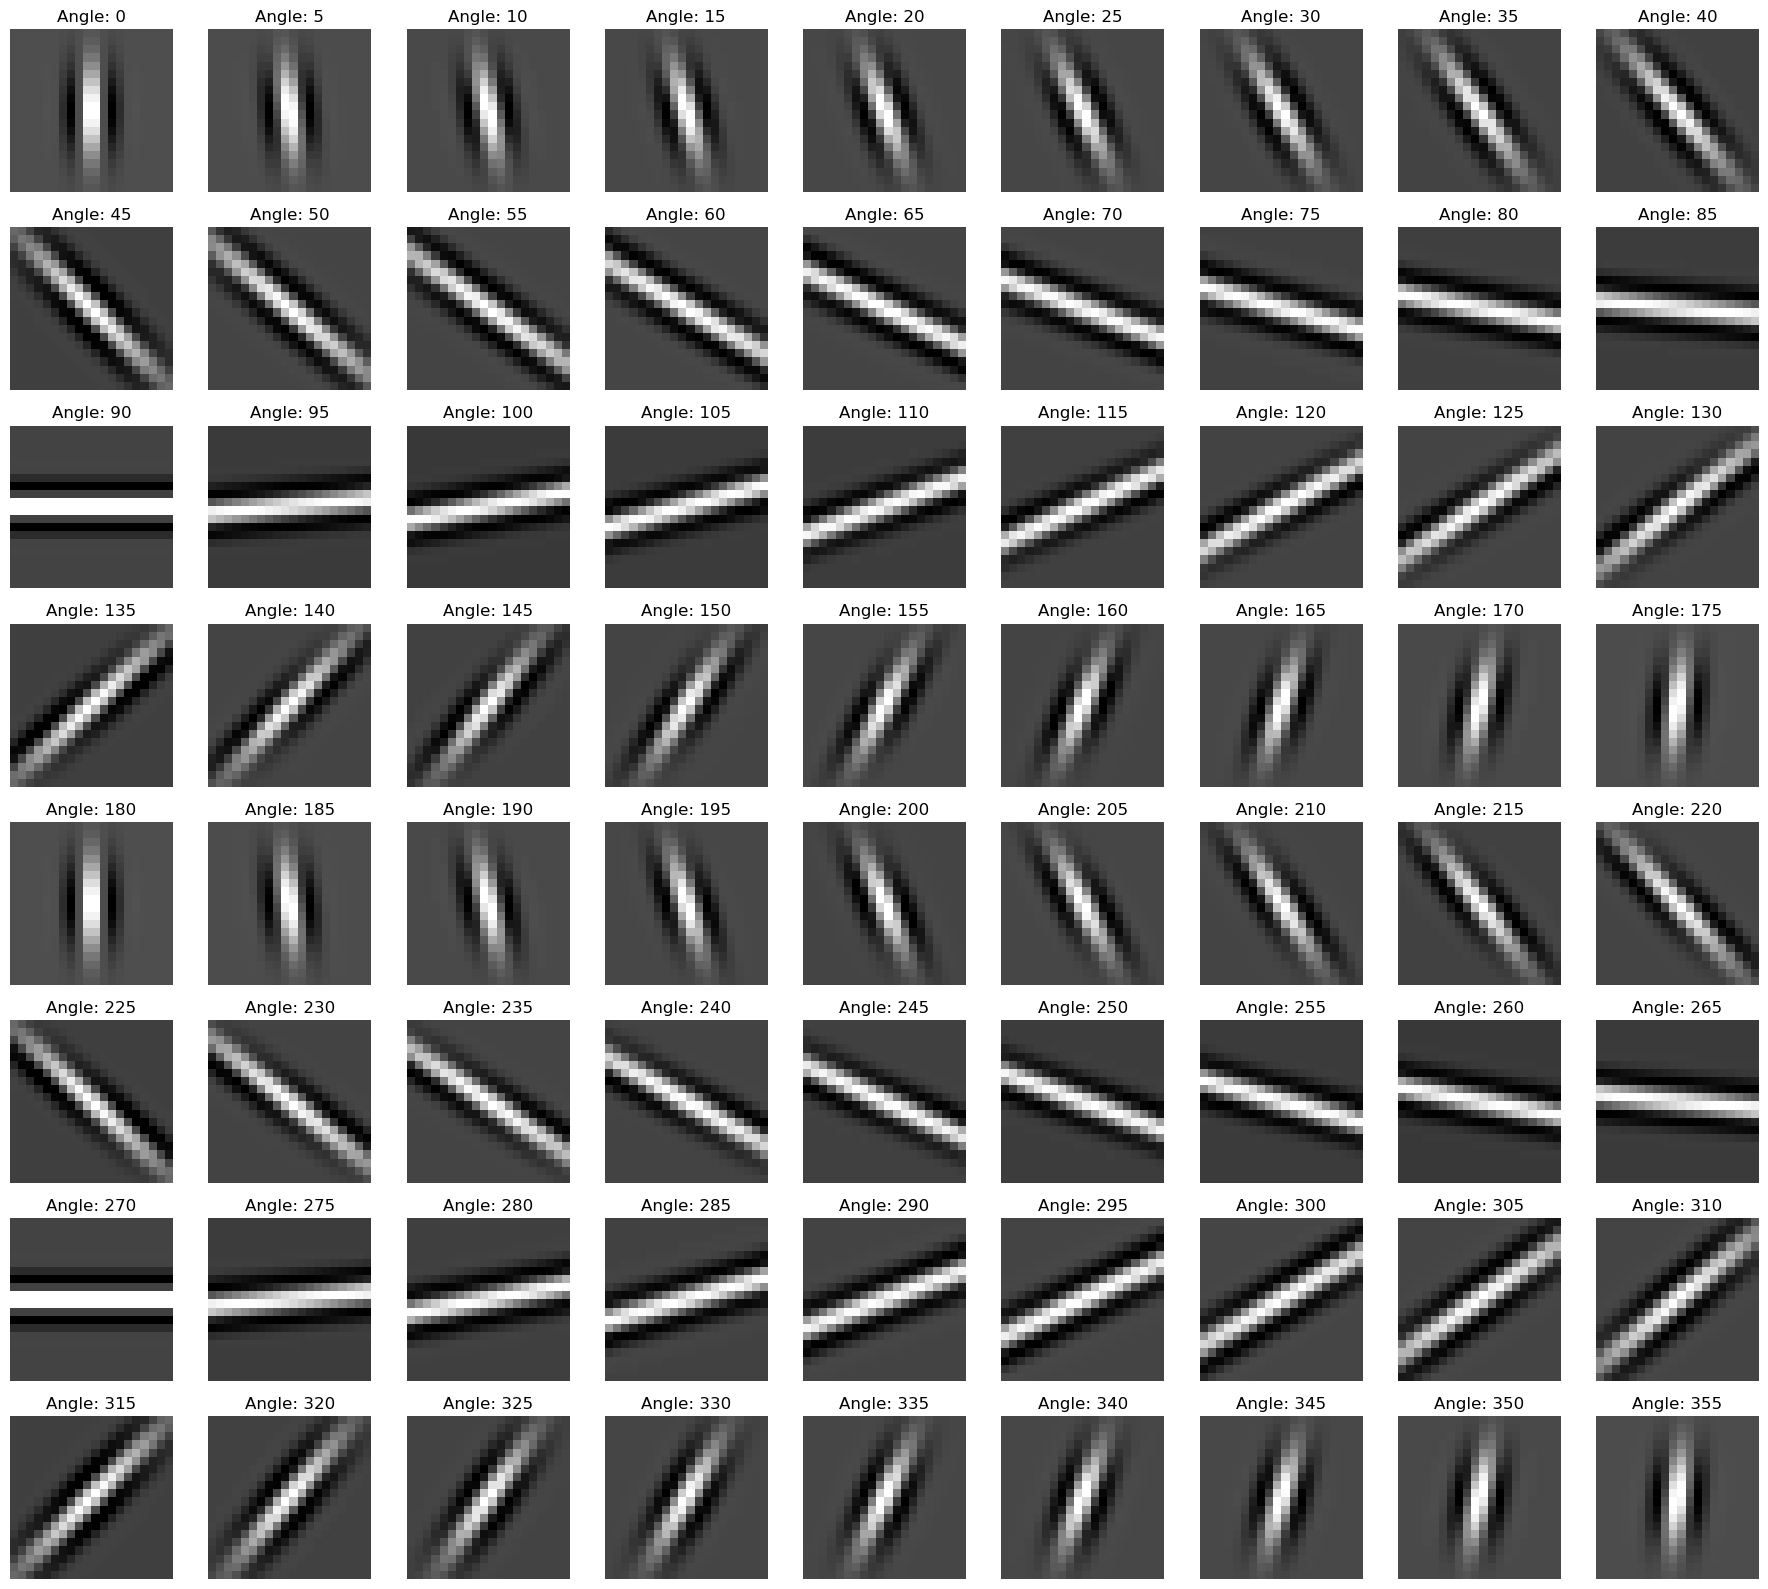

In [3]:
n = 72
row = 8
col = int(n/row)
step = int(360/n)

sigma_x = 1
sigma_y = 2

plt.figure(figsize=(18,16))
for i in range(n):
    kernel = gabor_filter(sigma_x, sigma_y, i*step)
    plt.subplot(row,col,i+1)
    plt.imshow(kernel, cmap='gray')
    plt.title('Angle: ' + str(i*step))
    plt.axis('off')

plt.tight_layout()

---

### ACTIVATIONS

In [4]:
FILENAME = "../data/images/kingfisher-1905255_640.jpg"

(240, 360)


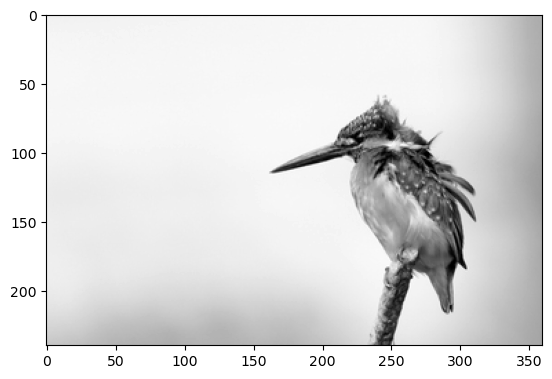

In [5]:
img = PIL.Image.open(FILENAME).convert('L')
img = np.array(img, dtype=float) / np.max(img)
plt.imshow(img, 'gray')
print(img.shape)

In [57]:
angle = 0
kernel = gabor_filter(sigma_x, sigma_y, angle)

In [84]:
h, w = img.shape
step = np.size(kernel, 0)

pad = int(np.ceil(step/2))
pad_im = np.pad(img, padding, mode='constant', constant_values=0)

[pad_h, pad_w] = pad_im.shape
features = np.zeros_like(pad_im)

for i in range(1,pad_w-step):
    for j in range(1, pad_h-step):
        patch = pad_im[j:j+step,i:i+step]
        conv = patch * kernel
        rate = np.sum(conv)
        features[int(j+(step/2)),int(i+(step/2))] = rate

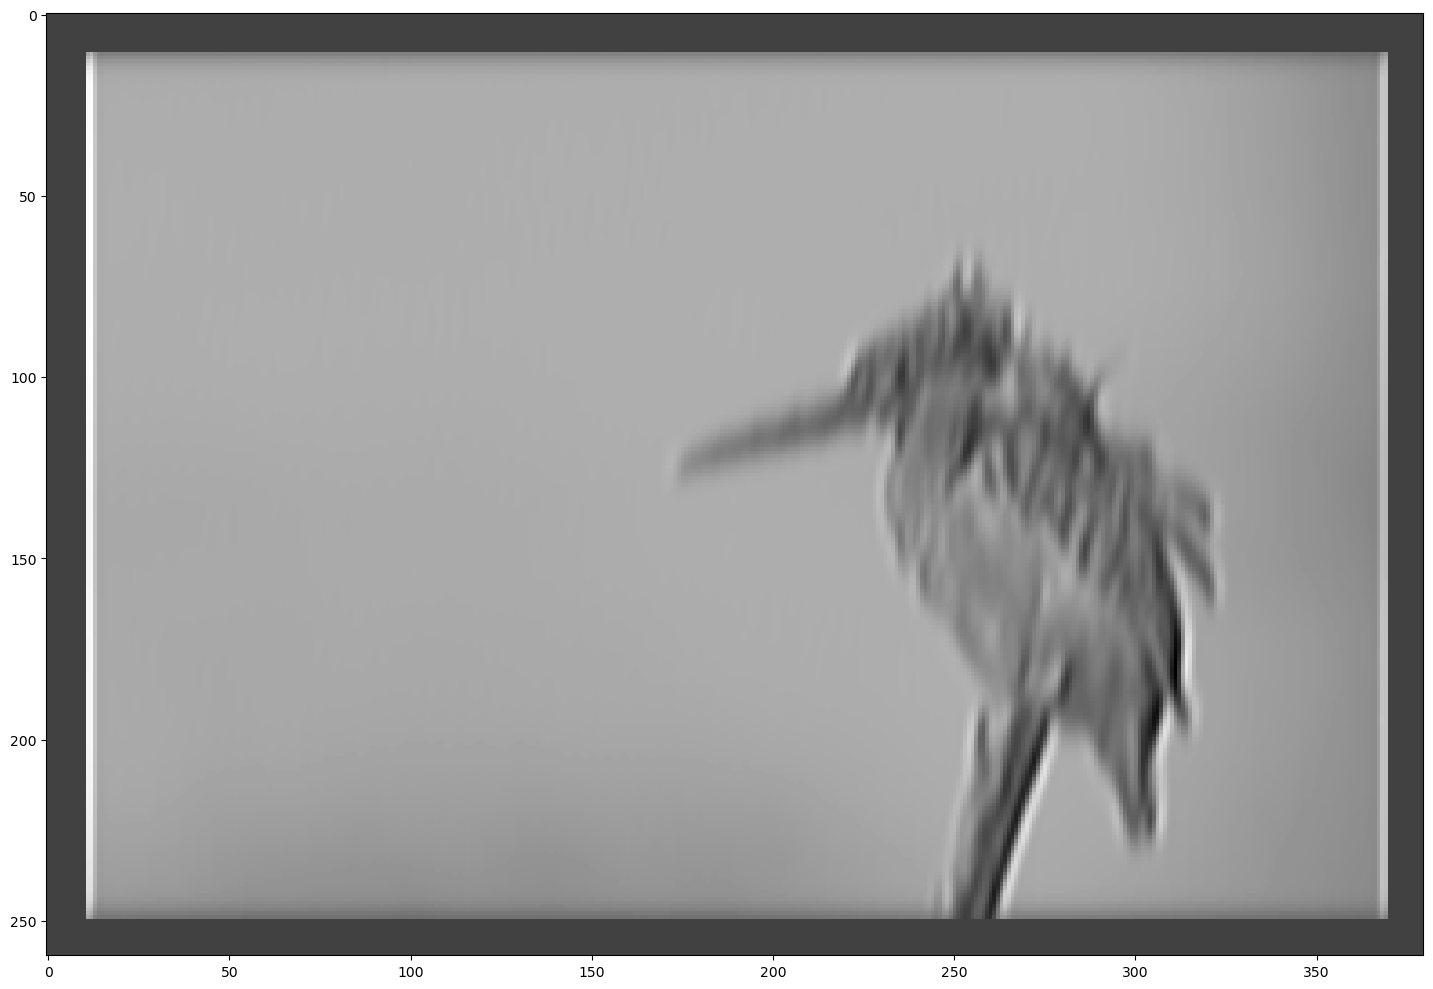

In [88]:
plt.figure(figsize=(15,10))
plt.imshow(features, 'gray')
plt.tight_layout()

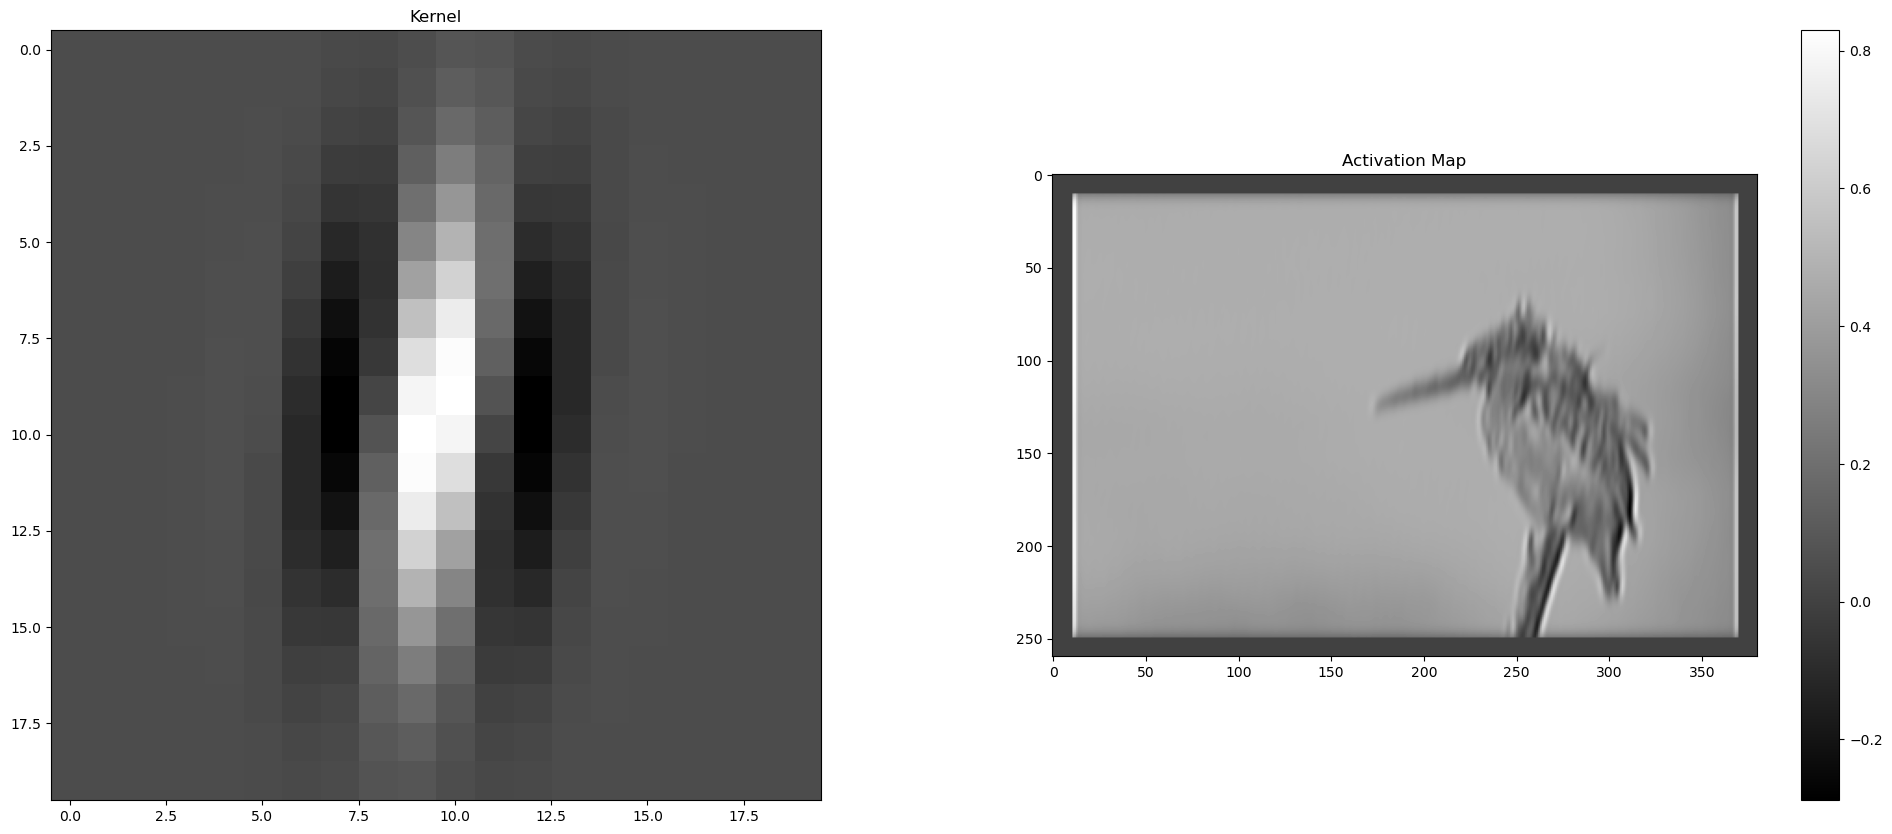

In [93]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.imshow(kernel, 'gray')
plt.title('Kernel')
plt.subplot(1,2,2)
plt.imshow(features, 'gray')
plt.title('Activation Map')
plt.colorbar()